- Title: Grouping, filtering with Pandas and plotly
- Slug: group-filter-pandas-plotly
- Category: Python Examples
- Date: 2024-07-08
- Tags: Python, Data Analysis, Plotly
- Author: Brian Estevez

### **Grouping**
- Grouping is a way to break data into subsets for further analysis
- ***Why do we group data?*** grouping data -and making comparisons between groups- is usually the only way to identify interesting patterns and trends
- By grouping data you effectively create a 'new' grouped data structure
- You may recognize that by taking an input and making a new data structure from it, we keep the original data intact, aligning with functional programming concepts 
    - i.e., we always want to maintain the integrity of the original data and keep things clear and concise


#### ***Working with built-in datasets***
- In this lesson we will use a dataset on life expectancy in different regions of the world
- Here we are working with a built-in dataset from **Plotly** (an interactive graphing library)
    - To load Plotly's built-in life expectancy dataset, we use the function **px.data.gapminder()**
    - **Why?**: saves us effort of downloading data, parsing and cleaning data, allowing us to focus on grouping and plotting 

**Key point: Grouping is a way to break data into meaningful comparisons, making it easier to derive insights from the data**


In [2]:
# check if you have plotly installed, using !conda plotly
# if not installed you will not see it listed, install plotly according to your venv 
# use conda install plotly
# or use pip install plotly
# finsstr, is a windows command line tool to search for plotly in the list
# !pip list | findstr plotly
!conda list | findstr plotly

plotly                    5.22.0             pyhd8ed1ab_0    conda-forge


In [3]:
# If you find Plotly is not installed with the above checks,
# ensure you have Conda installed and your Conda environment activated.
# Activate your Conda environment using: conda activate <your_env_name>
# Then, install Plotly by running the command: conda install plotly
# Note: You don't need to be in the project folder to install packages with Conda,
# but make sure the correct environment is activated

In [4]:
# after installing plotly confirm it is installed
!conda list | findstr plotly

plotly                    5.22.0             pyhd8ed1ab_0    conda-forge


In [5]:
# load packages
import pandas as pd 
import plotly.express as px

from itables import init_notebook_mode, show #to fully take advantage of the ability to display our data as a table format, let's use the itables library 
%matplotlib inline 

init_notebook_mode(all_interactive=True) #After this, any Pandas DataFrame, or Series, is displayed as interactive table, which lets you explore, filter or sort your data



In [6]:
# the following code cell will give you a nice hover highlighting on your tables when used with itables library (for details on itables see the itables lesson on my Git)

In [7]:

%%html
<style>
  .dataTables_wrapper tbody tr:hover {
    background-color: #6495ED; /* Cornflower Blue */
  }
</style>


<!-- #1E3A8A (Dark Blue) -->
<!-- #0D9488 (Teal) -->
<!-- #065F46 (Dark Green) -->
<!-- #4C1D95 (Dark Purple) -->
<!-- #991B1B (Dark Red) -->
<!-- #374151 (Dark Gray) -->
<!-- #B45309 (Deep Orange) -->
<!-- #164E63 (Dark Cyan) -->
<!-- #4A2C2A (Dark Brown) -->
<!-- #831843 (Dark Magenta) -->
<!-- #1E3A8A (Dark Blue ) -->

<!-- Suggested Light Colors for Light Backgrounds -->
<!-- #AED9E0 (Light Blue) -->
<!-- #A7F3D0 (Light Teal) -->
<!-- #D1FAE5 (Light Green) -->
<!-- #DDD6FE (Light Purple) -->
<!-- #FECACA (Light Red) -->
<!-- #E5E7EB (Light Gray) -->
<!-- #FFEDD5 (Light Orange) -->
<!-- #B2F5EA (Light Cyan) -->
<!-- #FED7AA (Light Brown) -->
<!-- #FBCFE8 (Light Magenta) -->

In [8]:
# we will use  a plotly dataset
# built into the plotly libary  to explore grouping in pandas and then explore plotting with plotly

# load the dataset
gapminder_df = px.data.gapminder()

# confirm is it what we think it is ie., a dataframe

print(type(gapminder_df)) # will output: <class 'pandas.core.frame.DataFrame'>

# this will print a table of the data
gapminder_df

<class 'pandas.core.frame.DataFrame'>


country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

In [9]:
gapminder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [10]:
# From the column info() summary, we can see 
# the dataset has 1704 non-null records, 
# 5 numeric columns, including floats and integer data 

### **Groupby method: `groupby()`**
- Definition: Grouping the data by one or more variables
    - Each group consists of all rows in the dataset that have the same values within the grouping variable
    - Grouping variable -or just variable- means the column or column(s) being grouped
- Why use it?: 
    - Data segmentation and simplification: allows comparisons of subsets within a larger dataset by breaking them down into pieces
    - Aggregation: After grouping you can easily compute summary statistics for different segments of data, such as sums, averages, or counts

- Syntax:
    - Basic Grouping: `df.groupby('Column_name1')` groups data based on the unique values in Column_name1
    - Specify columns for stats: After grouping, specify columns on which to compute summary stats: `df.groupby('Column_name1')['Column_name2'].mean()`


### **Chaining**
- Definition: linking together multiple method calls or operations in a single expression
- Why use it?: 
    - Readability, Efficiency, and Maintainibility: Chaining allows code to be written in a more expressive -intent of code is clear- and concise manner
    - can make it easier to understand at a glance, especially if operations logically follow eachother -your future self and others will be very grateful!
- `df.groupby("Column_name1")["column_name_2].count().sum()`

In [11]:

# method to print the number of unique continents
print("Number of unique continents is:", gapminder_df["continent"].nunique())


Number of unique continents is: 5


In [12]:

# Group data by continent, save to a variable 

grouped_continents =  gapminder_df.groupby("continent")

# Calculate the number of non-null life expectancy values for each continent
# This uses the count function .count() 
    # to compute the number of non-null 'lifeExp' values for each unique'continent' group
    # count() after a groupby operation actually counts all non-null entries in each group, not distinct values
    
World_LifeExp = grouped_continents["lifeExp"].count()

print("Number of non-null life expectancy values per continent:\n",World_LifeExp)






Number of non-null life expectancy values per continent:
 continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: lifeExp, dtype: int64


In [13]:
# IF you are into the Olympics, 5 continents might be familiar - continent numbers can be defined differently, but not important here 
#  What is important here: what do the count values (624,300,396,360,24) in the life expectancy column actually represent?
    # We have grouped by continent and counted values of life expectancy for each group 
        # These values are the number of non-null data points for each group
        # Tells us Africa has the most data points with 624 records, whereas Oceania (Australia and other islands) has the least
        # Enables us to cross check with total records we expect, and decide whether some data is less robust, such as Oceania

In [14]:
# Lets quickly check the total values in the dataset to make sure we can account for all the data after grouping
    # Chain the sum function, a common type of summary statistic, to count the function
    # sum, aggregates the counts from each continent to provide a total count of non-null 'lifeExp' values across the dataset

sum_World_LifeExp = grouped_continents["lifeExp"].count().sum()

print("\n") # add spaced between printed outputs

print("Number of total non-null values for all continents is:", sum_World_LifeExp)




Number of total non-null values for all continents is: 1704


In [15]:
# The sum of non-null records across all 5 continents checks out, as we know we have 1704 non-null records in this dataset

In [16]:
# Calculate the average life expectancy for each continent
# This uses the mean function, a common type of summary statistic, to compute the average 'lifeExp' values grouped by 'continent'
avg_World_LifeExp = gapminder_df.groupby("continent")["lifeExp"].mean()

avg_World_LifeExp

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [17]:
# Here we grouped by continents and averaged life expectancy within each continent
# Interestingly, we see some differences with lowest average life expectancy in the continent of Africa and highest in Oceania

<Axes: title={'center': 'lifeExp'}, xlabel='continent'>

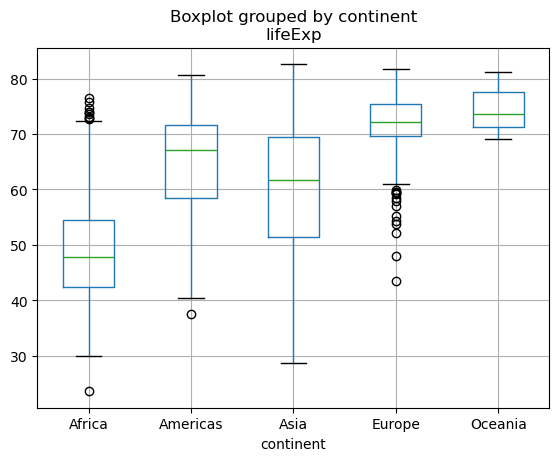

In [18]:

# Plot the data using pandas' built-in plotting capabilities
    # Boxplots are useful for comparing distributions by visually representing the median, quartiles, and outliers among different groups

# Key parameters used in this boxplot are:
    #   'column': Specifies the column for which the distribution is calculated and displayed, in this case, 'lifeExp' for life expectancy
    #   'by': Determines the grouping of data, similar to a 'groupby' operation, which in this plot is set to 'continent' to compare across continents
gapminder_df.boxplot(column="lifeExp", by="continent")



In [19]:
# Useful visual plot of the distribution of life expectancies across these 5 continents

<Axes: title={'center': 'lifeExp'}, xlabel='continent'>

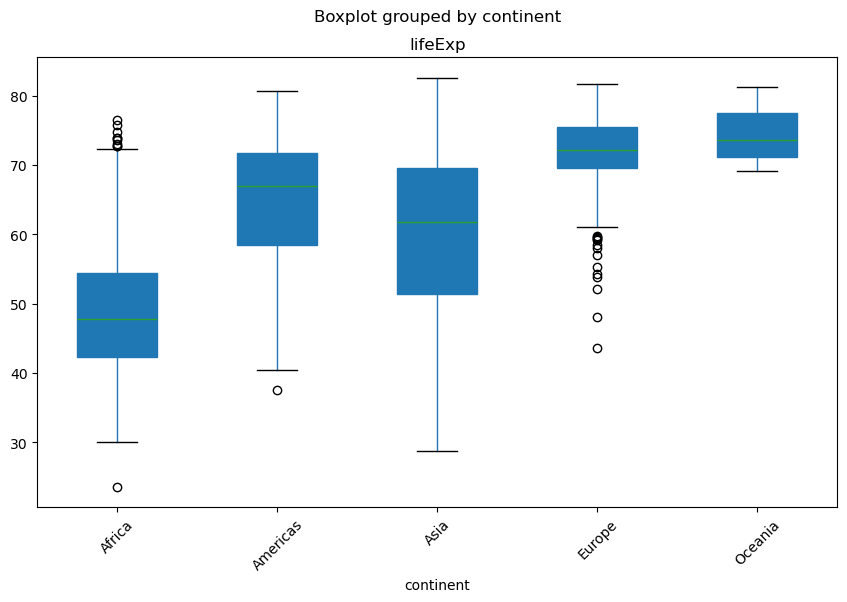

In [20]:
# Further explore pandas' built-in plotting capabilities
    # Customize the plot further to make it more visually appealing
    # accepts a number of different parameters, including figsize, rot, grid, and even patch_artist that will add color

gapminder_df.boxplot(column="lifeExp", by="continent", grid=False, figsize=(10, 6), rot=45, patch_artist=True) # patch artist fills the boxes



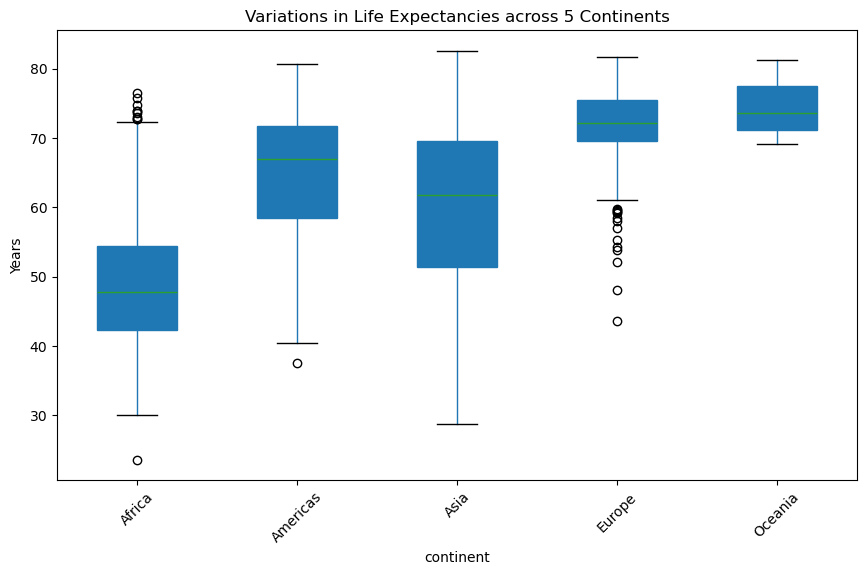

In [21]:
# lets customize a little bit further to add some labels, for this we will need to load matplot lib directly
#  after creating the plot with pandas
import matplotlib.pyplot as plt

# Create the boxplot
gapminder_df.boxplot(column="lifeExp", by="continent", grid=False, figsize=(10, 6), rot=45, patch_artist=True)

# Turn off the default title, and add a new title
plt.suptitle('')  # Removes the default title
plt.title('Variations in Life Expectancies across 5 Continents') 

# Set the ylabel
plt.ylabel('Years')



# Show the plot
plt.show()

In [22]:
# Pretty good plot, right?

# General Insights:
# - The boxplot highlights the variability and distribution of life expectancy within and between continents
# - The presence of outliers indicates significant deviations from typical life expectancy ranges, which vary by continent

# Specific Observations on Life Expectancy by Continent:
# - Africa shows a broad range of life expectancy, with its median much lower than other continents. This indicates generally lower life expectancy
# - In Africa, the lower quartile for life expectancy is around 45 years, indicating that at least 25% of the countries in the dataset have a life expectancy of 45 years or less
# - Outliers in Africa suggest that while low life expectancy is common, there are countries or regions within Africa where life expectancy approaches the highest observed globally. This could indicate specific areas with better health care, living conditions, or genetic factors.

# In-depth Analysis of Outliers:
# - Outliers on the lower end in continents like Europe indicate rare cases of significantly lower life expectancy, which could be due to specific health crises or localized issues
# - Conversely, outliers on the higher end in Africa provide a stark contrast to the continent's overall lower life expectancy metrics(i.e., lower mean, median, range, Quartiles) 
    #- These outliers warrant follow up analysis to understand the factors contributing to them, which may include better medical facilities, economic conditions, or other socio-economic factors

# Next Steps:
# - The following section will focus specifically on these high life expectancy outliers in Africa to identify potential patterns or causes contributing to these exceptional cases

### GroupBy Methods and attributes: `.get_group()` and `.groups`

The `.groupby()` method in pandas is used to split the data into groups based on some criteria. Methods like `.get_group()` and `.groups` attribute are commonly used to work with these groups:

- **`.groups` Attribute**: Returns a dictionary where the keys are the unique group labels, and the values are the row indices belonging to each group
    - This is useful for understanding the structure of the grouped data without actually viewing the data itself.

- **`.get_group()` Method**: Allows for the selection of a single group from the grouped object, specified by the group's name 
    - This is particularly useful when you want to perform operations on or analyze a specific group in isolation

In [23]:
# Some interesting data was seen using boxplot of life expectancy across continents
# Dig deeper by grouping the data by continent
grouped_data= gapminder_df.groupby("continent")



### OPTIONAL Step #################################
## uncommnent to run this portion 
## import json # OPTIONAL step to convert dictionary to json to get an easier to read print output for the grouped data

# #     Access and print each group using the group attribute of the groupby object
# #     the .groups attribute provides a dictionary mapping group labels to the row indices for those groups



##     # OPTIONAL: Use the json module and json.dumps() to format the .groups dictionary of groupby object data as a json with indenation to better read the data
##     # because the groups are pandas index objects we need to convert to python list before converting json
# print(json.dumps(list(grouped_data.groups), indent=4))

### End of OPTIONAL Step #################################



# Use .groups attribute to have groups printed out as a dictionary, i.e., a high-level or structural view of the data 
# Shows the keys as the unique group names from the columns and rows as index positions that belong to each group
print( grouped_data.groups)



{'Africa': [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, ...], 'Americas': [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 432, 433, 434, 435, ...],

In [24]:
# Get the data for a specific group
africa_data= grouped_data.get_group("Africa")

africa_data

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
24     Algeria    Africa  1952   43.077   9279525  2449.008185       DZA   
25     Algeria    Africa  1957   45.685  10270856  3013.976023       DZA   
26     Algeria    Africa  1962   48.303  11000948  2550.816880       DZA   
27     Algeria    Africa  1967   51.407  12760499  3246.991771       DZA   
28     Algeria    Africa  1972   54.518  14760787  4182.663766       DZA   
...        ...       ...   ...      ...       ...          ...       ...   
1699  Zimbabwe    Africa  1987   62.351   9216418   706.157306       ZWE   
1700  Zimbabwe    Africa  1992   60.377  10704340   693.420786       ZWE   
1701  Zimbabwe    Africa  1997   46.809  11404948   792.449960       ZWE   
1702  Zimbabwe    Africa  2002   39.989  11926563   672.038623       ZWE   
1703  Zimbabwe    Africa  2007   43.487  12311143   469.709298       ZWE   

      iso_num  
24         12  
25         12  
26         12  
27         12  
28         12  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[624 rows x 8 columns]

## **Filtering**
- **Definition**: Filtering involves **selecting rows or groups** from a DataFrame based on a condition or set of conditions 
    - It's a way to ***select and analyze a subset of the dataset that meets certain criteria***

- **Why use it?**:
    - **Data Analysis and Exploration**: Filtering allows you to focus on specific segments of your data that are of interest
    - **Preparation for Further Analysis**: Often, you'll need to filter your data to prepare for more complex analyses or visualizations, and/or removing unnecessary data
- **Filtering Types**:
    - Row-wise
    - Group-wise

### **Row-wise Filtering**
#### **Brackets method: []**

- **Syntax**:
    - Filter rows of data using the Brackets `[]`
    - **Single Condition**: `df[df['Column_name'] > value]` selects rows where the value in 'Column_name' is greater than `value`
    - **Multiple Conditions**: Combine conditions using `&` (and) or `|` (or): 
        - `df[(df['Column_name1'] > value1) & (df['Column_name2'] < value2)]` # AND condition
        - `df[(df['Column_name1'] > value1) | (df['Column_name2'] < value2)]` # OR condition

#### **Query method query():** 
- A more readable and concise way to filter rows based on conditions. It allows you to pass the condition as a string, which can be more intuitive, especially with complex conditions
    - **Single Condition**: `df.query('Column_name > value')` selects rows where the value in 'Column_name' is greater than `value`
    - **Multiple Conditions**: You can also combine conditions using `&` (and) or `|` (or) within the query string:
        - `df.query('Column_name1 > value1 & Column_name2 < value2')` # AND condition
        - `df.query('Column_name1 > value1 | Column_name2 < value2')` # OR condition
    - **Using Variables in Query**: You can use external variables in your query string by prefixing them with an `@` symbol. This is useful when you want to use dynamic values in your conditions.
        - Example: If you have a variable `threshold = 100`, you can use it in your query as follows: `df.query('Column_name > @threshold')`

- **Advantages of Using `.query()` Method**:
    - **Readability**: The `.query()` method can make your code more readable, especially when dealing with complex conditions.
    - **Performance**: For large DataFrames, the `.query()` method can be faster than boolean indexing.
    - **Convenience**: Using external variables directly in the query string adds a layer of convenience and dynamism to your data filtering tasks.

#### Single condition filtering with brackets[]

In [25]:
# Filter the dataset for rows where the continent is 'Africa' using the brackets method
# It's good practice to wrap each condition in parentheses, even if not strictly required i.e., it can work but is less clear

africa_df = gapminder_df[(gapminder_df["continent"] == "Africa")]

# Sort the filtered data by life expectancy in descending order
# This allows us to see the countries within Africa with the highest life expectancy at the top
africa_df.sort_values(by="lifeExp", ascending=False)


country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
1271       Reunion    Africa  2007   76.442    798094   7670.122558       REU   
1270       Reunion    Africa  2002   75.744    743981   6316.165200       REU   
1269       Reunion    Africa  1997   74.772    684810   6071.941411       REU   
911          Libya    Africa  2007   73.952   6036914  12057.499280       LBY   
1571       Tunisia    Africa  2007   73.923  10276158   7092.923025       TUN   
...            ...       ...   ...      ...       ...           ...       ...   
1032    Mozambique    Africa  1952   31.286   6446316    468.526038       MOZ   
1344  Sierra Leone    Africa  1952   30.331   2143249    879.787736       SLE   
36          Angola    Africa  1952   30.015   4232095   3520.610273       AGO   
552         Gambia    Africa  1952   30.000    284320    485.230659       GMB   
1292        Rwanda    Africa  1992   23.599   7290203    737.068595       RWA   

      iso_num  
1271      638  
1270      638  
1269      638  
911       434  
1571      788  
...       ...  
1032      508  
1344      694  
36         24  
552       270  
1292      646  

[624 rows x 8 columns]

In [26]:
# From the lower life expectancy sort we see that that in 2007 Reunion has a life expectancy of ~76 years,
#  however, Reunion is not really what most people think about when they hear 'Africa'
#  in fact it is an island and French territory off that is off the south-east coast of Africa

In [27]:
# Although we can filter the entire dataset to Africa with brackets,
#  let's use the grouped data groupby object we created earlier
# Let's use the grouped data for Africa we created earlier

# Filter the Africa dataset to include only rows where Life expectancy less than 40
                 #dataset       # Filter criteria 
africa_df_bel40= africa_data[(africa_data["lifeExp"]<40)]

# Sort the filtered data by life expectancy in descending order to see the countries with the highest life expectancy first
africa_df.sort_values(by="lifeExp", ascending=False)


country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
1271       Reunion    Africa  2007   76.442    798094   7670.122558       REU   
1270       Reunion    Africa  2002   75.744    743981   6316.165200       REU   
1269       Reunion    Africa  1997   74.772    684810   6071.941411       REU   
911          Libya    Africa  2007   73.952   6036914  12057.499280       LBY   
1571       Tunisia    Africa  2007   73.923  10276158   7092.923025       TUN   
...            ...       ...   ...      ...       ...           ...       ...   
1032    Mozambique    Africa  1952   31.286   6446316    468.526038       MOZ   
1344  Sierra Leone    Africa  1952   30.331   2143249    879.787736       SLE   
36          Angola    Africa  1952   30.015   4232095   3520.610273       AGO   
552         Gambia    Africa  1952   30.000    284320    485.230659       GMB   
1292        Rwanda    Africa  1992   23.599   7290203    737.068595       RWA   

      iso_num  
1271      638  
1270      638  
1269      638  
911       434  
1571      788  
...       ...  
1032      508  
1344      694  
36         24  
552       270  
1292      646  

[624 rows x 8 columns]

#### Multi-condition filtering with brackets

In [28]:
# We can also achieve the same result from the original data, without starting with the grouped data 

# Filter the original dataset to include only rows where the continent is 'Africa' and Life expectancy less than 40

                    #dataset       # Filter criteria 1                  # Filter criteria 2
africa_df_bel40= gapminder_df[(gapminder_df["continent"]=="Africa") & (gapminder_df["lifeExp"]<40)]

# Sort the filtered data by life expectancy in descending order to see the countries with the highest life expectancy first
africa_df_bel40.sort_values(by="lifeExp", ascending=False)

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
1702      Zimbabwe    Africa  2002   39.989  11926563   672.038623       ZWE   
1584        Uganda    Africa  1952   39.978   5824797   734.753484       UGA   
952           Mali    Africa  1972   39.977   5828158   581.368876       MLI   
42          Angola    Africa  1982   39.942   7016384  2756.953672       AGO   
43          Angola    Africa  1987   39.906   7874230  2430.208311       AGO   
...            ...       ...   ...      ...       ...          ...       ...   
1032    Mozambique    Africa  1952   31.286   6446316   468.526038       MOZ   
1344  Sierra Leone    Africa  1952   30.331   2143249   879.787736       SLE   
36          Angola    Africa  1952   30.015   4232095  3520.610273       AGO   
552         Gambia    Africa  1952   30.000    284320   485.230659       GMB   
1292        Rwanda    Africa  1992   23.599   7290203   737.068595       RWA   

      iso_num  
1702      716  
1584      800  
952       466  
42         24  
43         24  
...       ...  
1032      508  
1344      694  
36         24  
552       270  
1292      646  

[98 rows x 8 columns]

In [29]:
# Multi-sort 
# we add in year in descending order
# Sort the filtered data 
# by life expectancy in ascending,
    # Adding year  in this way is likely not going to change the results 
    # because it is unlikely we will have ties in Life Expectancy which will then trigger use of the sorting by year to break those ties
africa_data.sort_values(by=["lifeExp","year"], ascending=[True,False])

country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
1292        Rwanda    Africa  1992   23.599   7290203    737.068595       RWA   
552         Gambia    Africa  1952   30.000    284320    485.230659       GMB   
36          Angola    Africa  1952   30.015   4232095   3520.610273       AGO   
1344  Sierra Leone    Africa  1952   30.331   2143249    879.787736       SLE   
1032    Mozambique    Africa  1952   31.286   6446316    468.526038       MOZ   
...            ...       ...   ...      ...       ...           ...       ...   
1571       Tunisia    Africa  2007   73.923  10276158   7092.923025       TUN   
911          Libya    Africa  2007   73.952   6036914  12057.499280       LBY   
1269       Reunion    Africa  1997   74.772    684810   6071.941411       REU   
1270       Reunion    Africa  2002   75.744    743981   6316.165200       REU   
1271       Reunion    Africa  2007   76.442    798094   7670.122558       REU   

      iso_num  
1292      646  
552       270  
36         24  
1344      694  
1032      508  
...       ...  
1571      788  
911       434  
1269      638  
1270      638  
1271      638  

[624 rows x 8 columns]

In [30]:
# From the lower life expectancy sort we see that in 1992 Rwanda had a life expectancy of ~24 years
# so question number 1 answered - now we understand that outlier we saw in the boxplot was Rwanda
# can we be sure of this?

In [31]:
# print summary stats for africa alone and the most relevant columns to assist our analysis
africa_data[["lifeExp","year"]].describe()

lifeExp        year
count  624.00000   624.00000
mean    48.86533  1979.50000
std      9.15021    17.27411
min     23.59900  1952.00000
25%     42.37250  1965.75000
50%     47.79200  1979.50000
75%     54.41150  1993.25000
max     76.44200  2007.00000

In [32]:
# From these two tables of descriptive summary statistics on the African continent subset we observe that:
    # years range from 1952-2007
    # Confirmed that there exists a large range of data for life expectancy,
    #  including a data point with a life expectancy of about 24 years!


#### **Single condition filtering with the query method**

In [33]:
# Filter the dataset to rows where continent is africa and life expectancy is less than 40 
africa_data.query('lifeExp<40')

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
36       Angola    Africa  1952   30.015   4232095  3520.610273       AGO   
37       Angola    Africa  1957   31.999   4561361  3827.940465       AGO   
38       Angola    Africa  1962   34.000   4826015  4269.276742       AGO   
39       Angola    Africa  1967   35.985   5247469  5522.776375       AGO   
40       Angola    Africa  1972   37.928   5894858  5473.288005       AGO   
...         ...       ...   ...      ...       ...          ...       ...   
1463  Swaziland    Africa  2007   39.613   1133066  4513.480643       SWZ   
1536       Togo    Africa  1952   38.596   1219113   859.808657       TGO   
1584     Uganda    Africa  1952   39.978   5824797   734.753484       UGA   
1690     Zambia    Africa  2002   39.193  10595811  1071.613938       ZMB   
1702   Zimbabwe    Africa  2002   39.989  11926563   672.038623       ZWE   

      iso_num  
36         24  
37         24  
38         24  
39         24  
40         24  
...       ...  
1463      748  
1536      768  
1584      800  
1690      894  
1702      716  

[98 rows x 8 columns]

In [34]:
# Add the @ character to pass in a variable to the query

# Filter the dataset to rows where continent is africa and life expectancy is 40

lifeExp_Threshold = 40 # store our filter criteria value in a variable

africa_data.query('lifeExp<@lifeExp_Threshold')

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
36       Angola    Africa  1952   30.015   4232095  3520.610273       AGO   
37       Angola    Africa  1957   31.999   4561361  3827.940465       AGO   
38       Angola    Africa  1962   34.000   4826015  4269.276742       AGO   
39       Angola    Africa  1967   35.985   5247469  5522.776375       AGO   
40       Angola    Africa  1972   37.928   5894858  5473.288005       AGO   
...         ...       ...   ...      ...       ...          ...       ...   
1463  Swaziland    Africa  2007   39.613   1133066  4513.480643       SWZ   
1536       Togo    Africa  1952   38.596   1219113   859.808657       TGO   
1584     Uganda    Africa  1952   39.978   5824797   734.753484       UGA   
1690     Zambia    Africa  2002   39.193  10595811  1071.613938       ZMB   
1702   Zimbabwe    Africa  2002   39.989  11926563   672.038623       ZWE   

      iso_num  
36         24  
37         24  
38         24  
39         24  
40         24  
...       ...  
1463      748  
1536      768  
1584      800  
1690      894  
1702      716  

[98 rows x 8 columns]

#### **Multi-condition filtering with query method**

In [35]:
# Use the query method to filter the dataset to rows where continent is africa, 
# life expectancy less than 40 and year prior to 2000 


africa_data.query('lifeExp<@lifeExp_Threshold&year<2000')

country continent  year  lifeExp      pop    gdpPercap iso_alpha  \
36     Angola    Africa  1952   30.015  4232095  3520.610273       AGO   
37     Angola    Africa  1957   31.999  4561361  3827.940465       AGO   
38     Angola    Africa  1962   34.000  4826015  4269.276742       AGO   
39     Angola    Africa  1967   35.985  5247469  5522.776375       AGO   
40     Angola    Africa  1972   37.928  5894858  5473.288005       AGO   
...       ...       ...   ...      ...      ...          ...       ...   
1400  Somalia    Africa  1992   39.658  6099799   926.960296       SOM   
1440    Sudan    Africa  1952   38.635  8504667  1615.991129       SDN   
1441    Sudan    Africa  1957   39.624  9753392  1770.337074       SDN   
1536     Togo    Africa  1952   38.596  1219113   859.808657       TGO   
1584   Uganda    Africa  1952   39.978  5824797   734.753484       UGA   

      iso_num  
36         24  
37         24  
38         24  
39         24  
40         24  
...       ...  
1400      706  
1440      736  
1441      736  
1536      768  
1584      800  

[95 rows x 8 columns]

## **Group-wise filtering**

### **filter() method**
- Group-wise filtering allows you to filter datasets by groups 
- use it after a groupby operation
- **Syntax:** 
    - `df.groupby("column").filter(lambda x: x["column"].mean() < value)`
- usecase: filters groups based on a group-wise computation
    - will only keep the groups for which the function returns True
    - you can filter for groups that have a specific mean, sum or count value


### **Group-wise summary statistics**
#### **.agg() method**
- Compute summary statistics on grouped data
- syntax:
    - `dataframe.groupby("column").agg({"column":"mean", "column2":"median", "column2":"count"})`

In [36]:
# Say we don't know the group we are looking for ...
# but we know that the criteria is it should be the continent with average life expectancy less than 50

continents_LEbelow50= gapminder_df.groupby("continent").filter(lambda x: x["lifeExp"].mean()<50)

print(continents_LEbelow50["continent"].unique()) # this will give us the unique list of continents
 
continents_LEbelow50 # its clear that the only continent with life expectancy below 50 is Africa

['Africa']


country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
24     Algeria    Africa  1952   43.077   9279525  2449.008185       DZA   
25     Algeria    Africa  1957   45.685  10270856  3013.976023       DZA   
26     Algeria    Africa  1962   48.303  11000948  2550.816880       DZA   
27     Algeria    Africa  1967   51.407  12760499  3246.991771       DZA   
28     Algeria    Africa  1972   54.518  14760787  4182.663766       DZA   
...        ...       ...   ...      ...       ...          ...       ...   
1699  Zimbabwe    Africa  1987   62.351   9216418   706.157306       ZWE   
1700  Zimbabwe    Africa  1992   60.377  10704340   693.420786       ZWE   
1701  Zimbabwe    Africa  1997   46.809  11404948   792.449960       ZWE   
1702  Zimbabwe    Africa  2002   39.989  11926563   672.038623       ZWE   
1703  Zimbabwe    Africa  2007   43.487  12311143   469.709298       ZWE   

      iso_num  
24         12  
25         12  
26         12  
27         12  
28         12  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[624 rows x 8 columns]

In [37]:
# Say we don't know the group we are looking for ...
# but we know that the criteria is it should be the continent with average life expectancy less than 50

country_LEbelow50= africa_data.groupby("country").filter(lambda x: x["lifeExp"].max()<50)

print(country_LEbelow50["country"].unique()) # this will give us the unique list of continents
 
country_LEbelow50 # its clear that the only continent with life expectancy below 50 is Africa

['Angola' 'Burundi' 'Congo, Dem. Rep.' 'Guinea-Bissau' 'Liberia' 'Malawi'
 'Mozambique' 'Nigeria' 'Rwanda' 'Sierra Leone' 'Somalia']


country continent  year  lifeExp      pop    gdpPercap iso_alpha  \
36     Angola    Africa  1952   30.015  4232095  3520.610273       AGO   
37     Angola    Africa  1957   31.999  4561361  3827.940465       AGO   
38     Angola    Africa  1962   34.000  4826015  4269.276742       AGO   
39     Angola    Africa  1967   35.985  5247469  5522.776375       AGO   
40     Angola    Africa  1972   37.928  5894858  5473.288005       AGO   
...       ...       ...   ...      ...      ...          ...       ...   
1399  Somalia    Africa  1987   44.501  6921858  1093.244963       SOM   
1400  Somalia    Africa  1992   39.658  6099799   926.960296       SOM   
1401  Somalia    Africa  1997   43.795  6633514   930.596428       SOM   
1402  Somalia    Africa  2002   45.936  7753310   882.081822       SOM   
1403  Somalia    Africa  2007   48.159  9118773   926.141068       SOM   

      iso_num  
36         24  
37         24  
38         24  
39         24  
40         24  
...       ...  
1399      706  
1400      706  
1401      706  
1402      706  
1403      706  

[132 rows x 8 columns]

In [38]:
# Say we don't know the group we are looking for ...
# but we know that the criteria is it should be the continent with max life expectancy over 70

country_LEover70= africa_data.groupby("country").filter(lambda x: x["lifeExp"].max()>70)

print(country_LEover70["country"].unique()) # this will give us the unique list of continents
 
country_LEover70 # Now we have identified those African countries where life expectancy is above average 

['Algeria' 'Egypt' 'Libya' 'Mauritius' 'Morocco' 'Reunion' 'Tunisia']


country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
24    Algeria    Africa  1952   43.077   9279525  2449.008185       DZA   
25    Algeria    Africa  1957   45.685  10270856  3013.976023       DZA   
26    Algeria    Africa  1962   48.303  11000948  2550.816880       DZA   
27    Algeria    Africa  1967   51.407  12760499  3246.991771       DZA   
28    Algeria    Africa  1972   54.518  14760787  4182.663766       DZA   
...       ...       ...   ...      ...       ...          ...       ...   
1567  Tunisia    Africa  1987   66.894   7724976  3810.419296       TUN   
1568  Tunisia    Africa  1992   70.001   8523077  4332.720164       TUN   
1569  Tunisia    Africa  1997   71.973   9231669  4876.798614       TUN   
1570  Tunisia    Africa  2002   73.042   9770575  5722.895655       TUN   
1571  Tunisia    Africa  2007   73.923  10276158  7092.923025       TUN   

      iso_num  
24         12  
25         12  
26         12  
27         12  
28         12  
...       ...  
1567      788  
1568      788  
1569      788  
1570      788  
1571      788  

[84 rows x 8 columns]

In [39]:
gapminder_df.groupby("continent").agg({"lifeExp": "mean", "pop": "median"})

lifeExp         pop
continent                       
Africa     48.865330   4579311.0
Americas   64.658737   6227510.0
Asia       60.064903  14530830.5
Europe     71.903686   8551125.0
Oceania    74.326208   6403491.5

## **Plotting Data with Pandas** 

<Axes: xlabel='year'>

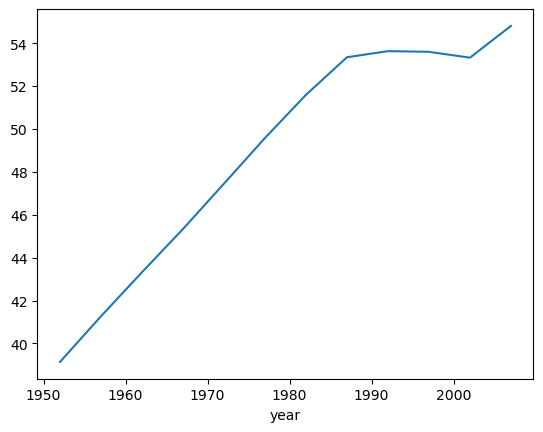

In [40]:
# Lets look at the time trend for Life Expectancy in Africa 

# Plotting the mean life expectancy over time
# A line plot is ideal for this time series data as it shows trends clearly
africa_df.groupby("year")["lifeExp"].mean().plot(kind='line')



<Axes: title={'center': 'Life Expectancy in Africa Over Time'}, xlabel='Year', ylabel='Life Expectancy'>

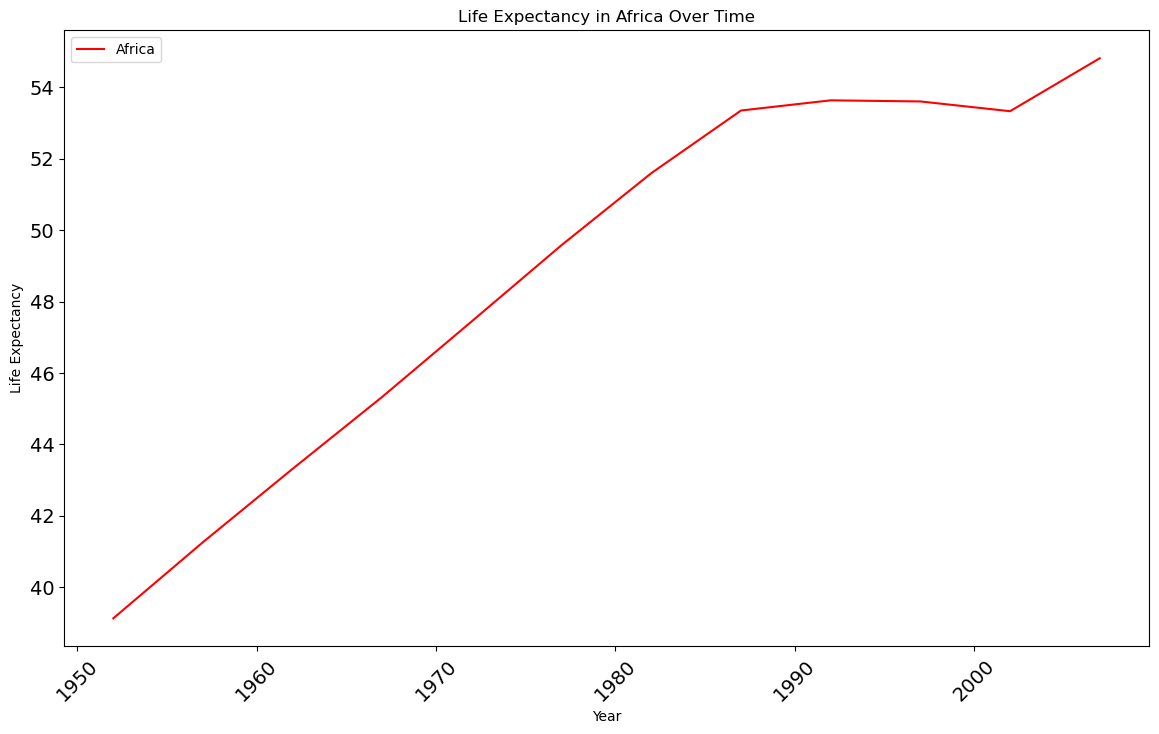

In [41]:
# Improve the line plot

# Group the overall Africa dataset by year and calculate mean life expectancy
africa_life_exp = africa_df.groupby("year")["lifeExp"].mean()

# plot the line with some customization   
africa_life_exp.plot(
    kind='line', legend=True, figsize=(14, 8), color='red', label='Africa', 
    grid=False, xlabel="Year",  title="Life Expectancy in Africa Over Time",ylabel="Life Expectancy", fontsize=14, rot=45)  # added additional plot parameters: labels, change figure size and color etc.


In [42]:
# Say you want to iterate over a group in the groupby and print data for each group

# Sample DataFrame
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B'],
    'Values': [10, 20, 30, 40]
})

# Grouping by 'Category'
grouped_data = df.groupby('Category')

# Iterating over each group
# Pandas will unpack each item grouped_data (the groupby object) into its group key and corresponding dataframe slice
for group_name, group_df in grouped_data:
    print(f"Group Name: {group_name}")
    print(f"Data:\n{group_df}\n")

# In this example:

# group_name will be 'A' in the first iteration and 'B' in the second
# group_df will be the subset of df where Category is 'A' in the first iteration, and where Category is 'B' in the second.=
# This pattern is very powerful for performing operations on each group individually within a loop

Group Name: A
Data:
  Category  Values
0        A      10
2        A      30

Group Name: B
Data:
  Category  Values
1        B      20
3        B      40



In [43]:
# What we did here was iterate over a groupby object:
    # In the loop we represent the current group by its group_name and group_df, which are aliases
    # group_name is used to represent the 'key' or unique name of the current group in the iteration
    # group_df is to represent the dataframe slice that corresponds to the current group_name in the iteration

This is group named Africa
This is group named Americas
This is group named Asia
This is group named Europe
This is group named Oceania


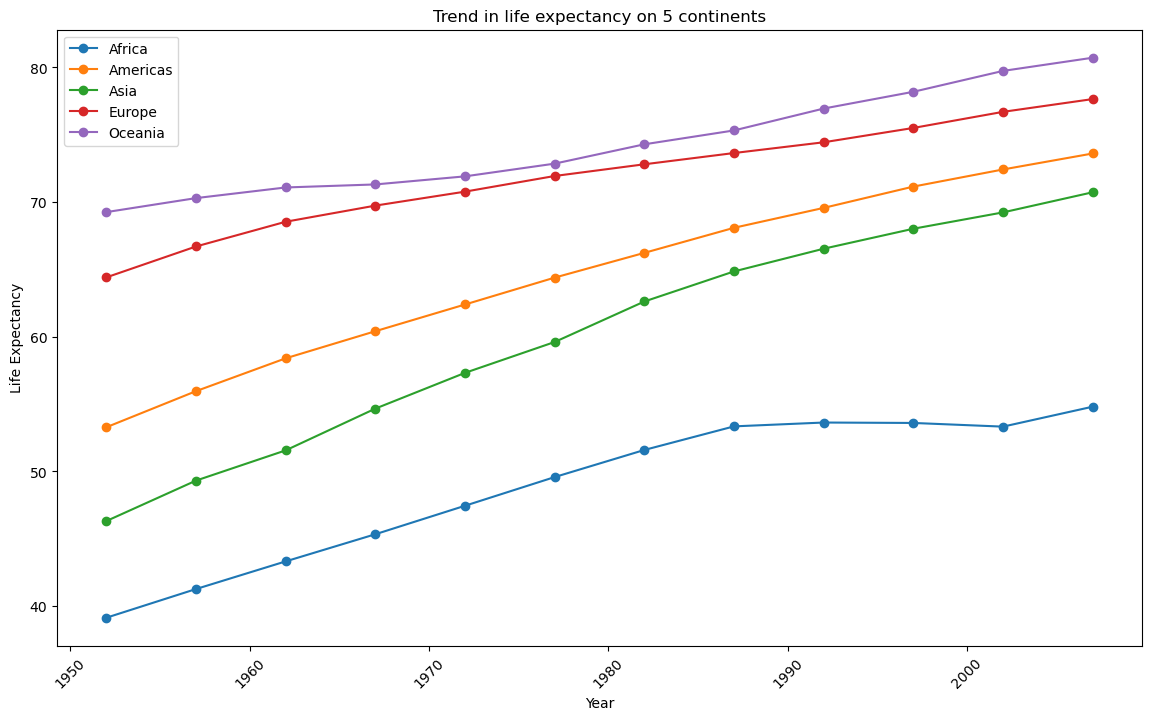

In [44]:
# Plot trends in life expectency for all continents on the same plot

for g_name, g_data  in grouped_continents:
        print('This is group named', g_name)
        # we chained functions together, rather than making a variables 
        g_data.groupby("year")["lifeExp"].mean().plot(kind='line',title= 'Trend in life expectancy on 5 continents',xlabel='Year', ylabel='Life Expectancy' , label=g_name,legend=True , linestyle='-', marker='o', rot=45, figsize=( 14,8))


#### Focus on Subset of data

In [45]:
# OK. We have seen that africa has the most diverse life expectancy 
# Let's dig a bit deeper 

# Count the total number of records in the Africa data subset, regardless of whether there are any null values
print("The number of total records in the Africa data subset is:", len(africa_data))

# Count the number of non-null records in the 'lifeExp' column of the Africa data subset, does not count rows that are NaN (Not a Number)
print("Count of non-null records in the 'lifeExp' column of the Africa data subset:", africa_data["lifeExp"].count())

# Count how many unique countries are in the Africa data subset
print("Number of unique countries in the Africa data subset:", africa_data["country"].nunique())

# Count non-null records for Rwanda across all columns. This shows the count per column
print("Count of non-null records for the African country of Rwanda (per column):", africa_data[africa_data["country"] == 'Rwanda'].count())

The number of total records in the Africa data subset is: 624
Count of non-null records in the 'lifeExp' column of the Africa data subset: 624
Number of unique countries in the Africa data subset: 52
Count of non-null records for the African country of Rwanda (per column): country      12
continent    12
year         12
lifeExp      12
pop          12
gdpPercap    12
iso_alpha    12
iso_num      12
dtype: int64


<Axes: title={'center': 'Life Expectancy in Rwanda vs Africa Over Time'}, xlabel='Year', ylabel='Life Expectancy'>

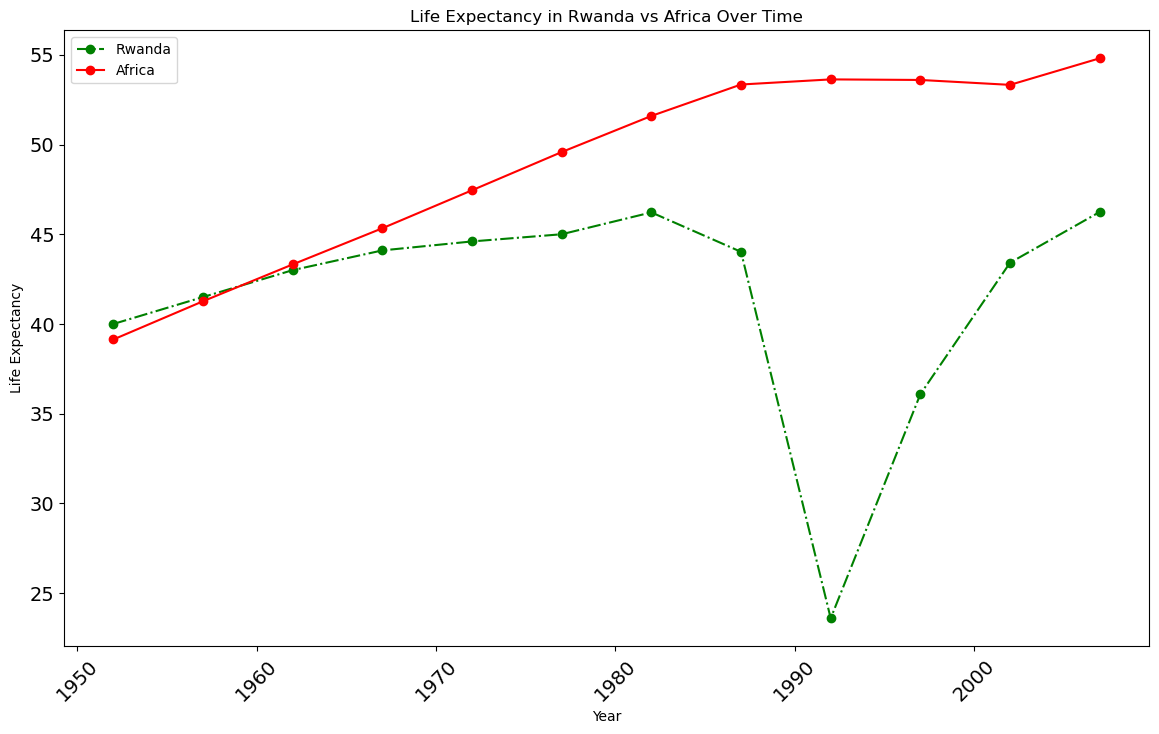

In [46]:
# Let's compare life expectancy trends between all of Africa versus Rwanda

# Filter the African dataset for Rwanda and assign the grouped data to rwanda_df
rwanda_df = africa_df[africa_df["country"]=="Rwanda"] # This not only makes the code cleaner but also allows for easier debugging and additional manipulation if needed later.

# Group Rwanda data by year and calculate mean life expectancy, then plot
rwanda_life_exp = rwanda_df.groupby("year")["lifeExp"].mean()
rwanda_life_exp.plot(
    kind='line', legend=True, figsize=(14, 8), color='green', label='Rwanda', 
    grid=False, linestyle='dashdot', title="Life Expectancy in Rwanda vs Africa Over Time", marker='o')

# Group the overall Africa dataset by year and calculate mean life expectancy, then plot
africa_life_exp = africa_df.groupby("year")["lifeExp"].mean()
africa_life_exp.plot(
    kind='line', legend=True, figsize=(14, 8), color='red', label='Africa', 
    grid=False, xlabel="Year", ylabel="Life Expectancy", fontsize=14, rot=45, marker='o')

In [47]:
# We still have not understood the African countries with high life Expectancy
# Let's try to plot all the data and see if that can get somewhere

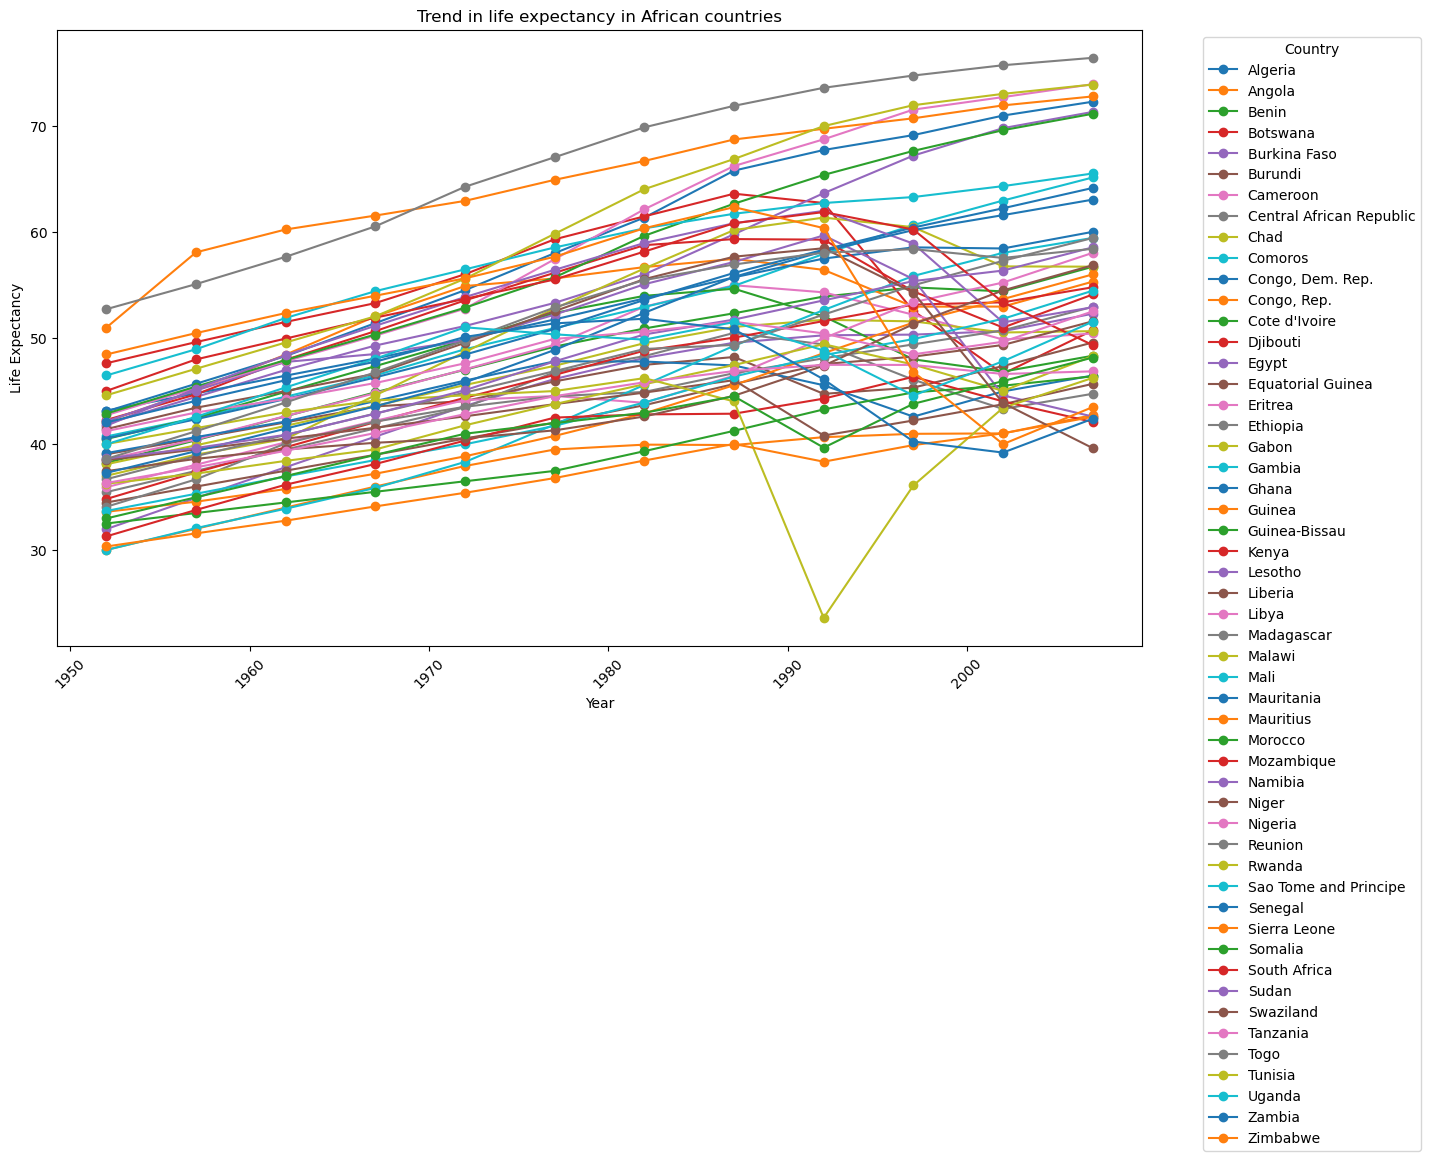

In [48]:
african_countries = africa_data.groupby("country")
# Plot trends in life expectency for all continents on the same plot

import matplotlib.pyplot as plt

# Initialize the plot with the first group to get the 'ax' object
fig, ax = plt.subplots(figsize=(14, 8))

for country_name, g_data in african_countries:
    # Plot on the same 'ax' object
    g_data.groupby("year")["lifeExp"].mean().plot(ax=ax, kind='line', title='Trend in life expectancy in African countries', xlabel='Year', ylabel='Life Expectancy', label=country_name, legend=True, linestyle='-', marker='o')

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

# Move the legend outside the plot area
ax.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [49]:
# This is not too helpful

In [50]:

# Compute the maximum life expectancy for each african country
# Here, 'african_countries' is a GroupBy object created by grouping 'africa_data' by the "country" column
    # The operation '["lifeExp"].max()' computes the maximum life expectancy for each country
    # This aggregation condenses the multiple records per country into a single record per country, representing the maximum life expectancy found in the dataset for that country
max_lifeExp_per_country = african_countries["lifeExp"].max()

# Find the top 10 countries with the largest maximum life expectancy
    # The 'nlargest(10)' method selects the top 10 values from 'max_lifeExp_per_country', which contains the maximum life expectancy for each country
    # This results in a Series of the top 10 countries with the highest maximum life expectancy values, sorted in descending order
top10_lifeExp_afr_countries = max_lifeExp_per_country.nlargest(10)

print("Top 10 african countries for max life expectancy:\n", top10_lifeExp_afr_countries)


# Find the bottom 10 countries with the lowest maximum life expectancy
    # The 'nsmallest(10)' method selects the bottom 10 values from 'max_lifeExp_per_country', which contains the maximum life expectancy for each country
    # This results in a Series of the bottom 10 countries for maximum life expectancy values, sorted in ascending order
bot10_lifeExp_afr_countries = max_lifeExp_per_country.nsmallest(10)

print("Bottom 10 african countries for max life expectancy:\n", bot10_lifeExp_afr_countries)



Top 10 african countries for max life expectancy:
 country
Reunion                  76.442
Libya                    73.952
Tunisia                  73.923
Mauritius                72.801
Algeria                  72.301
Egypt                    71.338
Morocco                  71.164
Sao Tome and Principe    65.528
Comoros                  65.152
Mauritania               64.164
Name: lifeExp, dtype: float64
Bottom 10 african countries for max life expectancy:
 country
Sierra Leone        42.568
Angola              42.731
Liberia             46.027
Rwanda              46.242
Mozambique          46.344
Guinea-Bissau       46.388
Nigeria             47.472
Congo, Dem. Rep.    47.804
Somalia             48.159
Malawi              49.420
Name: lifeExp, dtype: float64


In [51]:
# Before diving into plotting the life expectancy trends, 
# it's important to extract the names of the countries we're interested in analyzing
# For the bottom 10 countries with the lowest life expectancy, 
# we can access the index of the `bot10_lifeExp_afr_countries`, contains these country names. 
# This index is then converted to a list, 
# Will be used to filter our original dataset for these specific countries and then plot them

# Extracting the index (country names) of the bottom 10 records
print(bot10_lifeExp_afr_countries.index)

# Converting the index to a list for easier use in filtering
list_bottom10 = bot10_lifeExp_afr_countries.index.to_list()

# Displaying the list of bottom 10 countries
list_bottom10

Index(['Sierra Leone', 'Angola', 'Liberia', 'Rwanda', 'Mozambique',
       'Guinea-Bissau', 'Nigeria', 'Congo, Dem. Rep.', 'Somalia', 'Malawi'],
      dtype='object', name='country')


['Sierra Leone',
 'Angola',
 'Liberia',
 'Rwanda',
 'Mozambique',
 'Guinea-Bissau',
 'Nigeria',
 'Congo, Dem. Rep.',
 'Somalia',
 'Malawi']

In [52]:
# This method of extracting and utilizing the list of countries will apply to the top 10 countries with the highest life expectancy, 
# allowing us to efficiently compare the life expectancy trends between these two groups

### Customized Filtering with `.isin()` and `index.to_list()`

- **Overview**: 
  - The `.isin()` method in pandas is crucial for filtering data frames or series by checking each element's membership in a list or series of values. It returns a boolean Series, indicating the presence of each element in the specified list or series.
  - Generating the list for filtering can be done in two primary ways: manually defining a list or deriving it from a DataFrame's index

- **Methods for Generating Filter Criteria**:
  1. **Manually Defined List**: Directly specifying a list of values to filter by.
  2. **Derived from DataFrame's Index**: Using `df.index.to_list()`to generate a list from the index of a DataFrame, which can then be used as criteria for filtering.

- **Syntax**: 
  - Filtering: `DataFrame[Column].isin(values)`
  - Index to List: `df.index.to_list()`

- **Application**:
  - The `.isin()` method is versatile for filtering based on various criteria, whether the list of values is predefined or dynamically generated from another DataFrame's index.
  - `df.index.to_list()` serves as a method to dynamically create a list from a DataFrame's index, which can be particularly useful when the filtering criteria are based on unique identifiers or conditions reflected in the index.

#### Example of Manually Defined List:
```python
# Manually defined list of countries to include
countries_to_include = ['CountryA', 'CountryB', 'CountryC']
filtered_df = df[df['country'].isin(countries_to_include)]
```

#### Example of List Derived from DataFrame's Index:
```python
# Assuming 'other_df' is a DataFrame where the index represents unique countries
# Generating a list from the index of 'other_df'
countries_to_include = other_df.index.to_list()

# Using the generated list to filter 'df'
filtered_df = df[df['country'].isin(countries_to_include)]
```

In both scenarios, `filtered_df` will contain only the rows from `df` where the `'country'` column's value matches one of the entries in `countries_to_include`. The first method involves a static, user-defined list, while the second method dynamically generates the list based on the index of another DataFrame, showcasing the flexibility in generating filter criteria.

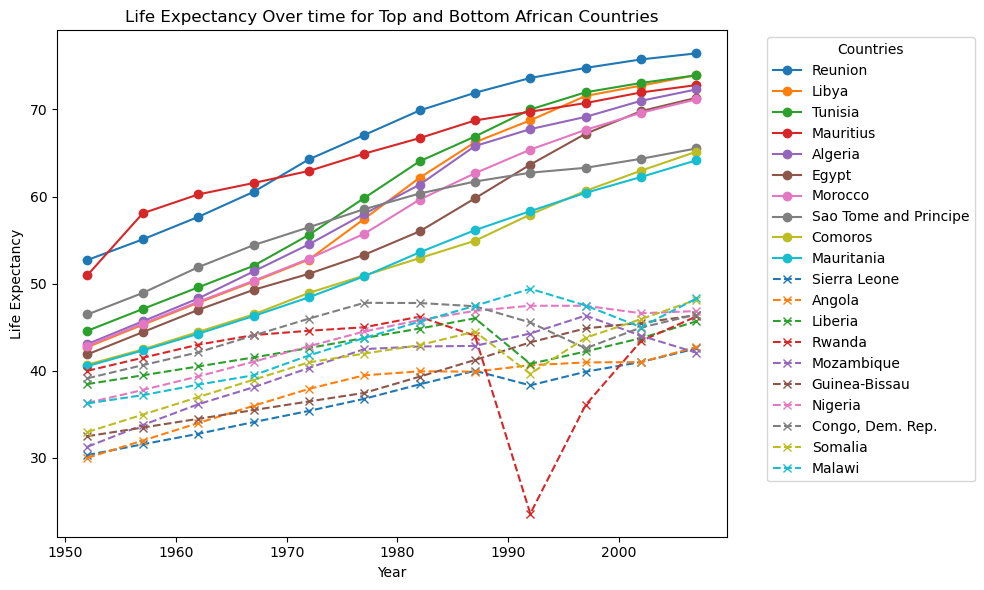

In [53]:
import matplotlib.pyplot as plt


# Extract the country names to a list
top_countries= top10_lifeExp_afr_countries.index.to_list()

bottom_countries= bot10_lifeExp_afr_countries.index.to_list()


# Filter the original data using the country lists
Filtered_top_bot_data = africa_data[africa_data["country"].isin(top_countries+bottom_countries)]


# plot the data

plt.figure(figsize=(10,6))

# Plot data for top countries
for country in top_countries:
    country_data = Filtered_top_bot_data[Filtered_top_bot_data["country"]== country]
    plt.plot(country_data['year'], country_data['lifeExp'], label=country, linestyle='-', marker='o')

# Plot data for bottom countries with a different style
for country in bottom_countries:
    country_data = Filtered_top_bot_data[Filtered_top_bot_data["country"]== country]
    plt.plot(country_data['year'], country_data['lifeExp'], label=country, linestyle='--', marker='x')

plt.title('Life Expectancy Over time for Top and Bottom African Countries')

plt.xlabel('Year')

plt.ylabel('Life Expectancy')

plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', title= "Countries")
plt.tight_layout()

In [54]:
from geopy.geocoders import Nominatim
import time

# Increase the timeout to 10 seconds
geolocator = Nominatim(user_agent="my_africa_countries_application", timeout=10)

# Function to get latitude and longitude
def get_lat_lon(country_name):
    try:
        location = geolocator.geocode(country_name)
        return (location.latitude, location.longitude)
    except:
        return (None, None)

# Retrieve coordinates for top and bottom countries
coordinates = {country: get_lat_lon(country) for country in top_countries + bottom_countries}

# To avoid hitting the request limit, add a small sleep time in the loop if necessary
time.sleep(1)

print(coordinates)

{'Reunion': (None, None), 'Libya': (None, None), 'Tunisia': (None, None), 'Mauritius': (None, None), 'Algeria': (None, None), 'Egypt': (None, None), 'Morocco': (None, None), 'Sao Tome and Principe': (None, None), 'Comoros': (None, None), 'Mauritania': (None, None), 'Sierra Leone': (None, None), 'Angola': (None, None), 'Liberia': (None, None), 'Rwanda': (None, None), 'Mozambique': (None, None), 'Guinea-Bissau': (None, None), 'Nigeria': (None, None), 'Congo, Dem. Rep.': (None, None), 'Somalia': (None, None), 'Malawi': (None, None)}


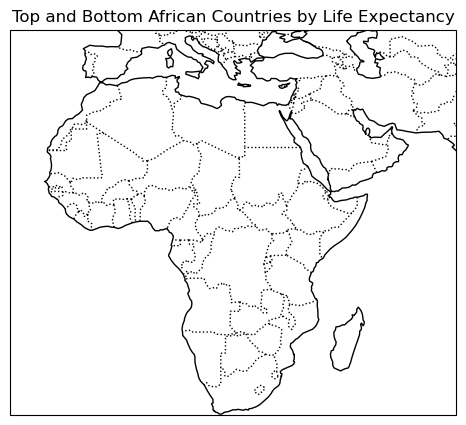

In [55]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Assuming you have a dictionary `coordinates` with country names as keys and (latitude, longitude) tuples as values

fig = plt.figure(figsize=(10, 5))

# Create a map using the PlateCarree projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Set the extent to cover the African continent
ax.set_extent([-25.0, 70.0, -35.0, 47.0], crs=ccrs.PlateCarree())


# Plot each country's coordinates
# Assuming `top_countries` and `bottom_countries` are lists of country names
for country, (lat, lon) in coordinates.items():
    if lat and lon:  # Check if lat and lon are not None
        color = 'green' if country in top_countries else 'red'
        plt.plot(lon, lat, marker='o', color=color, markersize=5, transform=ccrs.Geodetic())
        plt.text(lon, lat, country, transform=ccrs.Geodetic())

plt.title('Top and Bottom African Countries by Life Expectancy')
plt.show()

{'Algeria': 72.301, 'Angola': 42.731, 'Comoros': 65.152, 'Congo, Dem. Rep.': 46.462, 'Egypt': 71.33800000000002, 'Guinea-Bissau': 46.38800000000001, 'Liberia': 45.678, 'Libya': 73.952, 'Malawi': 48.303, 'Mauritania': 64.164, 'Mauritius': 72.801, 'Morocco': 71.164, 'Mozambique': 42.082, 'Nigeria': 46.859, 'Reunion': 76.442, 'Rwanda': 46.242, 'Sao Tome and Principe': 65.528, 'Sierra Leone': 42.56800000000001, 'Somalia': 48.159, 'Tunisia': 73.923}
[72.301, 42.731, 65.152, 46.462, 71.33800000000002, 46.38800000000001, 45.678, 73.952, 48.303, 64.164, 72.801, 71.164, 42.082, 46.859, 76.442, 46.242, 65.528, 42.56800000000001, 48.159, 73.923]


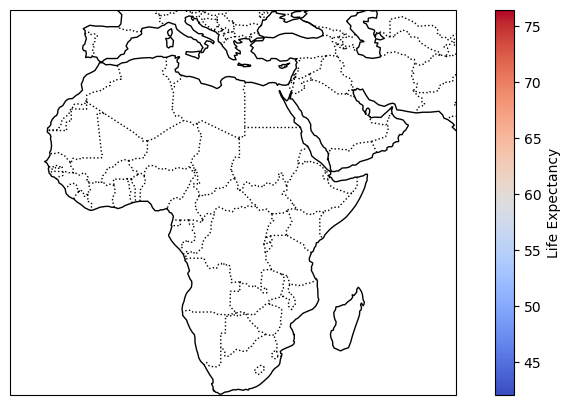

In [56]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm


# Convert Filtered_top_bot_data to a dictionary mapping countries to life expectancy
life_expectancy = Filtered_top_bot_data.set_index('country')['lifeExp'].to_dict()
print(life_expectancy)
print(list(life_expectancy.values()))
# Normalize life expectancy values to [0, 1] for colormap
life_expectancy_values = list(life_expectancy.values())
norm = plt.Normalize(min(life_expectancy_values), max(life_expectancy_values))
cmap = cm.ScalarMappable(norm=norm, cmap='coolwarm')  # Choose a colormap
cmap.set_array(life_expectancy_values)  # Set the array to the actual life expectancy values

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Set the extent to cover the African continent
ax.set_extent([-25.0, 70.0, -35.0, 47.0], crs=ccrs.PlateCarree())

for country, (lat, lon) in coordinates.items():
    if lat and lon and country in life_expectancy:  # Check if lat, lon, and life expectancy are not None
        color = cmap.to_rgba(life_expectancy[country])
        ax.plot(lon, lat, marker='o', color=color, markersize=5, transform=ccrs.Geodetic())
        ax.text(lon, lat, country, transform=ccrs.Geodetic())

# Specify the ax argument to plt.colorbar()
plt.colorbar(cmap, label='Life Expectancy', ax=ax, orientation='vertical')
plt.show()

## **Plotting data with Plotly**
- Plotly is a powerful graphing library that enables the creation of interactive, high quality graphs
- supports easy sharing  and collaboration on development of visuals online (e.g., dashboards)
- It supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases
- Plotly graphs can be easily integrated into web applications or viewed in any web browser
- Integrates well with Pandas DataFrames, making it a convenient and powerful tool for those already using Pandas for data manipulation